# Réduction de dataset
Réduction de la base de données `20newsgroups` en sélectionnant 10% de dataset et préservant la distribution des `targets`

In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sys import path
path.append("..")

from iads.preprocessing import add_real_labels

sns.set_theme(style="ticks")
plt.rcParams['font.family'] = 'Proxima Nova'

## Chargement de dataset

Text(0.5, 1.0, 'Distribution de target (dataset complet)')

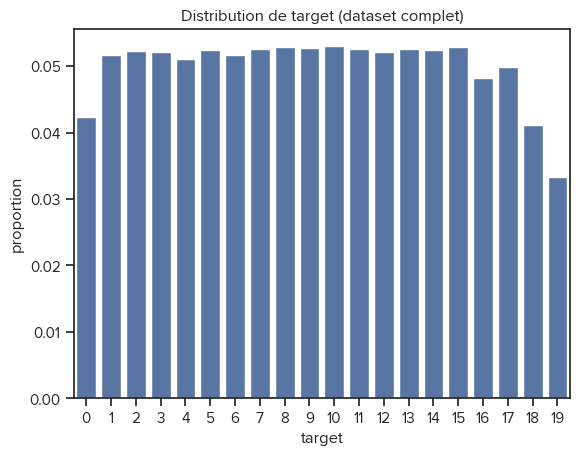

In [17]:
newsgroups_df = pd.read_csv("data/20newsgroups.csv")

ax = sns.barplot(data=newsgroups_df["target"].value_counts(normalize=True))
ax.set_title("Distribution de target (dataset complet)")

## Prendre 10% de dataset en préservant la distribution

,messages,target,label
249,\nSecular laws seem to value criminal life mor...,0,alt.atheism
12210,BR> From: wpr@atlanta.dg.com (Bill Rawlins)\nB...,0,alt.atheism
4126,: The willingness of true believers\n: to die ...,0,alt.atheism
8754,"\nKnowing Keith, I expect he'll bring the leat...",0,alt.atheism
5782,"\n""Manufacturing Consent,"" a film about the me...",0,alt.atheism
...,...,...,...
4319,NaN,19,comp.os.ms-windows.misc
17151,\n\nBecause that would contradict your religio...,19,comp.os.ms-windows.misc
12284,"\n\nAn extremely good example of ""circumstanti...",19,comp.os.ms-windows.misc
13400,"DROPLET VOL 1, No 11, Part 1\n\nA D R O P L E...",19,comp.os.ms-windows.misc


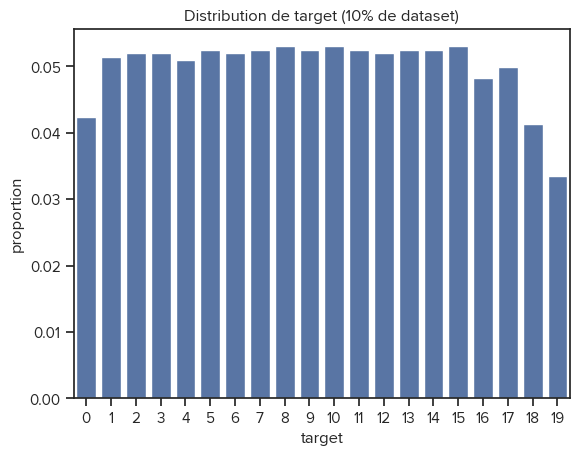

In [18]:
np.random.seed(1)
newsgroups_df = newsgroups_df.groupby("target").sample(frac=0.1)
newsgroups_df = add_real_labels(newsgroups_df)

ax = sns.barplot(data=newsgroups_df["target"].value_counts(normalize=True))
ax.set_title(f"Distribution de target (10% de dataset)")

newsgroups_df.to_csv("data/sample.csv", index=False)
newsgroups_df